# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [1]:
#Loading the peacock.jpeg

import base64
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
from fontTools.misc.bezierTools import epsilon

with open("peacock.jpeg", "rb") as img_file:
    base64_image = base64.b64encode(img_file.read()).decode()

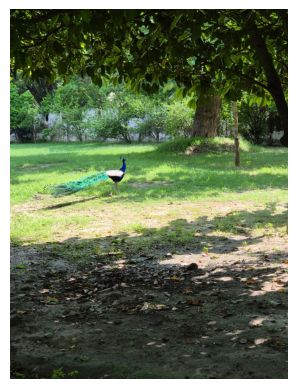

In [2]:
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

# Display the image in RGB
plt.imshow(img)
plt.axis("off")
plt.show()

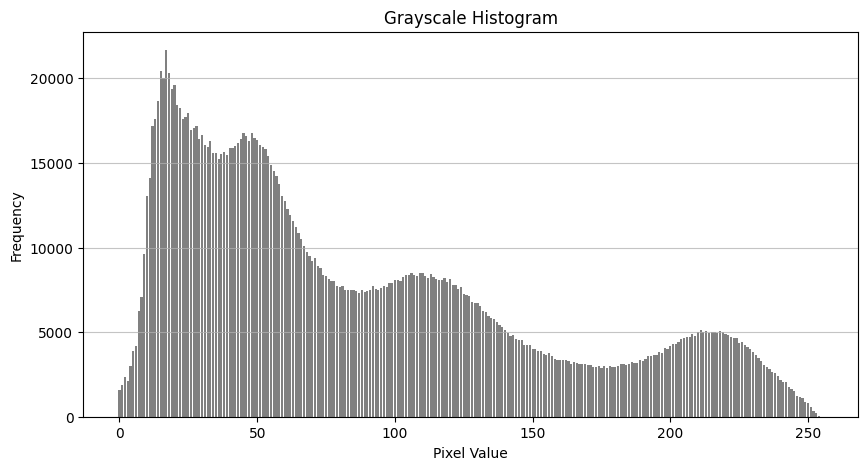

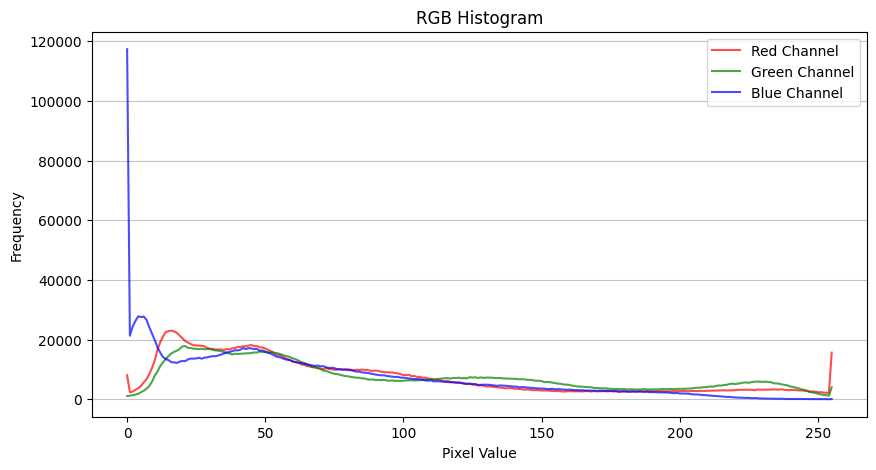

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_np = np.array(img)

# --- Part A.1: Grayscale Histogram ---

# Convert RGB image to grayscale
# The formula for grayscale conversion is R*0.2989 + G*0.5870 + B*0.1140
# The result is cast to np.uint8 to keep pixel values between 0-255.
gray_img_np = np.dot(img_np[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

def gray_histogram(gray_img):
    """
    Calculates the histogram of a grayscale image using pure NumPy loops.
    Input: non-normalized grayscale image (values 0-255).
    Output: 1D NumPy array representing the histogram.
    """
    # Initialize a NumPy array to store counts for each pixel value (0-255)
    hist = np.zeros(256, dtype=int)

    # Iterate through each pixel in the flattened grayscale image
    for pixel_value in gray_img.flatten():
        # Increment the count for the corresponding pixel value
        hist[pixel_value] += 1
    return hist

# Calculate the grayscale histogram
hist_gray = gray_histogram(gray_img_np)

# Plot the grayscale histogram
plt.figure(figsize=(10, 5))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(np.arange(256), hist_gray, color='gray')
plt.grid(axis='y', alpha=0.75)
plt.show()


# --- Part A.2: RGB Histogram ---

def rgb_histogram(rgb_img):
    """
    Calculates the histograms for R, G, and B channels of an RGB image
    using pure NumPy loops.
    Input: non-normalized RGB image (values 0-255).
    Output: Three 1D NumPy arrays representing the histograms for R, G, B channels.
    """
    # Initialize NumPy arrays to store counts for each channel
    hist_r = np.zeros(256, dtype=int)
    hist_g = np.zeros(256, dtype=int)
    hist_b = np.zeros(256, dtype=int)

    # Iterate through each pixel in the RGB image
    # This uses nested Python loops, which is consistent with "pure NumPy loops"
    # when referring to not using optimized C-backed functions like cv2.calcHist or np.bincount directly
    for row in rgb_img:
        for pixel in row:
            # Increment the count for each channel's pixel value
            hist_r[pixel[0]] += 1  # Red channel
            hist_g[pixel[1]] += 1  # Green channel
            hist_b[pixel[2]] += 1  # Blue channel
    return hist_r, hist_g, hist_b

# Calculate the RGB histograms
hist_r, hist_g, hist_b = rgb_histogram(img_np)

# Plot the RGB histograms
plt.figure(figsize=(10, 5))
plt.title("RGB Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(np.arange(256), hist_r, color='red', label='Red Channel', alpha=0.7)
plt.plot(np.arange(256), hist_g, color='green', label='Green Channel', alpha=0.7)
plt.plot(np.arange(256), hist_b, color='blue', label='Blue Channel', alpha=0.7)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rgb_to_hsv(img_rgb):

    # Normalize RGB values to 0-1 range for calculations
    img_rgb_norm = img_rgb.astype(np.float32) / 255.0

    R, G, B = img_rgb_norm[..., 0], img_rgb_norm[..., 1], img_rgb_norm[..., 2]

    # Calculate C_max, C_min, and delta
    C_max = np.maximum(np.maximum(R, G), B)
    C_min = np.minimum(np.minimum(R, G), B)
    delta = C_max - C_min

    H = np.zeros_like(R, dtype=np.float32)
    S = np.zeros_like(R, dtype=np.float32)
    V = C_max

    # Calculate Hue
    # Handle delta == 0 (grayscale values where hue is undefined, set to 0)
    H[delta == 0] = 0

    # Calculate Hue for C_max == R
    mask_r = (C_max == R) & (delta != 0)
    H[mask_r] = 60 * (((G[mask_r] - B[mask_r]) / delta[mask_r]) % 6)

    # Calculate Hue for C_max == G
    mask_g = (C_max == G) & (delta != 0)
    H[mask_g] = 60 * (((B[mask_g] - R[mask_g]) / delta[mask_g]) + 2)

    # Calculate Hue for C_max == B
    mask_b = (C_max == B) & (delta != 0)
    H[mask_b] = 60 * (((R[mask_b] - G[mask_b]) / delta[mask_b]) + 4)

    # Calculate Saturation
    # Handle C_max == 0 (black, saturation is 0)
    S[C_max == 0] = 0
    # Calculate Saturation for other cases
    S[C_max != 0] = delta[C_max != 0] / C_max[C_max != 0]

    # Scale H, S, V to OpenCV 8-bit compatible ranges
    # Hue: 0-360 degrees scaled to 0-179 (integer part, as OpenCV does for 8-bit)
    H = (H / 2).astype(np.uint8)
    # Saturation: 0-1 scaled to 0-255
    S = (S * 255).astype(np.uint8)
    # Value: 0-1 scaled to 0-255
    V = (V * 255).astype(np.uint8)

    # Stack H, S, V channels to form the HSV image
    img_hsv = np.stack([H, S, V], axis=-1)

    return img_hsv


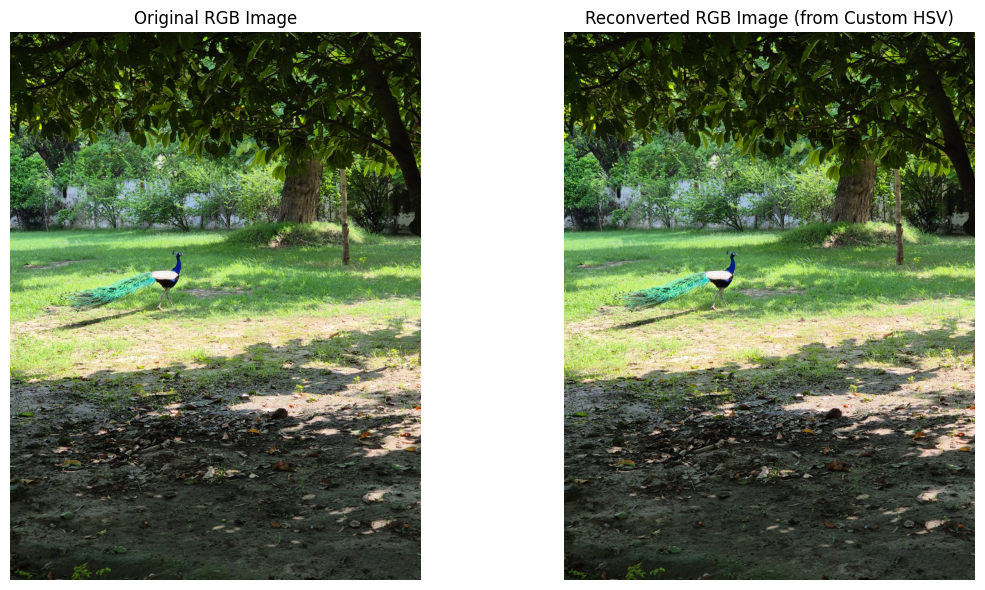

In [18]:
hsv_image_custom = rgb_to_hsv(img_np)

# Convert our custom HSV output back to RGB using OpenCV
# OpenCV's cvtColor often expects BGR, but for HSV2BGR/RGB, the channel order is consistent.
# We will convert our custom HSV (H,S,V) to BGR, and then BGR to RGB for consistent display.
reconverted_rgb_bgr = cv2.cvtColor(hsv_image_custom, cv2.COLOR_HSV2BGR)
reconverted_rgb = cv2.cvtColor(reconverted_rgb_bgr, cv2.COLOR_BGR2RGB)

# Display original and reconverted images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_np)
axes[0].set_title("Original RGB Image")
axes[0].axis("off")

axes[1].imshow(reconverted_rgb)
axes[1].set_title("Reconverted RGB Image (from Custom HSV)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Filter 1:
def vintage_film_grain_filter(img_rgb):
    """
    Applies a 'Vintage Film Grain' filter to an RGB image.
    This filter aims to create a classic, aged cinematic look.

    Modifications:
    1. Desaturation
    2. Warm Tone Tint
    3. Contrast Boost
    4. Subtle Split Toning (cool shadows, warm highlights)

    Input: img_rgb (NumPy array) - 0-255 RGB image (Height, Width, 3)
    Output: filtered_img_rgb (NumPy array) - 0-255 RGB image
    """
    # Convert to float for calculations
    img_float = img_rgb.astype(np.float32)

    # 1. Desaturation (Convert to HSV, reduce S, convert back)
    hsv_img = cv2.cvtColor(img_float.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    h, s, v = hsv_img[..., 0], hsv_img[..., 1], hsv_img[..., 2]

    desaturation_factor = 0.7 # Reduce saturation by 30%
    s_desaturated = np.clip(s * desaturation_factor, 0, 255)

    hsv_img_desaturated = np.stack([h, s_desaturated, v], axis=-1).astype(np.uint8)
    desaturated_rgb = cv2.cvtColor(hsv_img_desaturated, cv2.COLOR_HSV2RGB).astype(np.float32)

    # 2. Warm Tone Tint: Apply a subtle warm (yellow/orange) tint
    warm_tint_color = np.array([255, 190, 100], dtype=np.float32) # Soft yellow-orange
    warm_tint_strength = 0.15
    tinted_img = (desaturated_rgb * (1 - warm_tint_strength) + warm_tint_color * warm_tint_strength)
    tinted_img = np.clip(tinted_img, 0, 255)

    # 3. Contrast Boost
    contrast_factor = 1.15 # Increase contrast by 15%
    contrast_adjusted = (tinted_img - 128) * contrast_factor + 128
    contrast_adjusted = np.clip(contrast_adjusted, 0, 255)

    # 4. Subtle Split Toning (Cool shadows, warm highlights)
    # Convert back to HSV for easier manipulation of shadows/highlights based on V channel
    hsv_final = cv2.cvtColor(contrast_adjusted.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    h, s, v = hsv_final[..., 0], hsv_final[..., 1], hsv_final[..., 2]

    # Define shadow/highlight tints (in BGR format for OpenCV's merge, then convert to RGB concept)
    # For coolness in shadows, we'll shift the blue channel up in darker areas.
    # For warmth in highlights, we'll boost red/green in brighter areas.

    # Simple approximation: modify channels directly based on V
    final_rgb_channels = [contrast_adjusted[..., 0].copy(), contrast_adjusted[..., 1].copy(), contrast_adjusted[..., 2].copy()]

    # Cool shadows: increase blue component in darker areas
    shadow_mask = v < 120 # pixels with value less than 120 are considered shadows
    final_rgb_channels[2][shadow_mask] = np.clip(final_rgb_channels[2][shadow_mask] + 30, 0, 255) # Increase blue channel

    # Warm highlights: increase red and green components in brighter areas
    highlight_mask = v > 180 # pixels with value greater than 180 are considered highlights
    final_rgb_channels[0][highlight_mask] = np.clip(final_rgb_channels[0][highlight_mask] + 20, 0, 255) # Increase red channel
    final_rgb_channels[1][highlight_mask] = np.clip(final_rgb_channels[1][highlight_mask] + 10, 0, 255) # Increase green channel

    final_img_rgb = np.stack(final_rgb_channels, axis=-1)

    filtered_img_rgb = np.clip(final_img_rgb, 0, 255).astype(np.uint8)
    return filtered_img_rgb


In [11]:
#Filter 2:
def golden_hour_glow_filter(img_rgb):
    """
    Applies a 'Golden Hour Glow' filter to an RGB image.
    This filter aims to create a warm, rich, and dramatic lighting effect.

    Modifications:
    1. Contrast Adjustment (slight increase)
    2. Hue Rotation (shift towards warmer tones)
    3. Vibrance Boost
    4. Warm Yellow/Orange Custom Color Tint

    Input: img_rgb (NumPy array) - 0-255 RGB image (Height, Width, 3)
    Output: filtered_img_rgb (NumPy array) - 0-255 RGB image
    """
    # Convert to float for calculations
    img_float = img_rgb.astype(np.float32)

    # 1. Contrast Adjustment: Increase contrast
    # A common way is to adjust values around a midpoint (e.g., 128)
    contrast_factor = 1.1 # Increase contrast by 10%
    contrast_adjusted = (img_float - 128) * contrast_factor + 128
    contrast_adjusted = np.clip(contrast_adjusted, 0, 255)

    # Convert to HSV for hue and vibrance adjustments
    hsv_img = cv2.cvtColor(contrast_adjusted.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    h, s, v = hsv_img[..., 0], hsv_img[..., 1], hsv_img[..., 2]

    # 2. Hue Rotation: Shift hue towards warmer tones (e.g., reds/yellows)
    # OpenCV Hue range for 8-bit is 0-179. A shift of +10 typically moves towards red/orange.
    hue_shift = 10 # Shift hue by +10
    h_rotated = (h + hue_shift) % 180 # Wrap around 180

    hsv_img_hue_rotated = np.stack([h_rotated, s, v], axis=-1)

    # 3. Vibrance Boost: Increase saturation selectively (less saturated colors boosted more)
    # This is an approximation. Increase 's' but less for pixels already highly saturated.
    vibrance_strength = 0.15
    s_vibrance_boosted = s + vibrance_strength * (255 - s)
    s_vibrance_boosted = np.clip(s_vibrance_boosted, 0, 255)

    hsv_img_vibrance_boosted = np.stack([h_rotated, s_vibrance_boosted, v], axis=-1).astype(np.uint8)

    # Convert back to RGB for tint
    temp_rgb = cv2.cvtColor(hsv_img_vibrance_boosted, cv2.COLOR_HSV2RGB).astype(np.float32)

    # 4. Custom Color Tint: Apply a warm yellow/orange tint
    # Blend with a warm color like [255, 180, 0] (orange)
    warm_tint_color = np.array([255, 180, 0], dtype=np.float32) # Orange RGB
    warm_tint_strength = 0.15
    tinted_img_warm = (temp_rgb * (1 - warm_tint_strength) + warm_tint_color * warm_tint_strength)
    tinted_img_warm = np.clip(tinted_img_warm, 0, 255)

    filtered_img_rgb = np.clip(tinted_img_warm, 0, 255).astype(np.uint8)
    return filtered_img_rgb



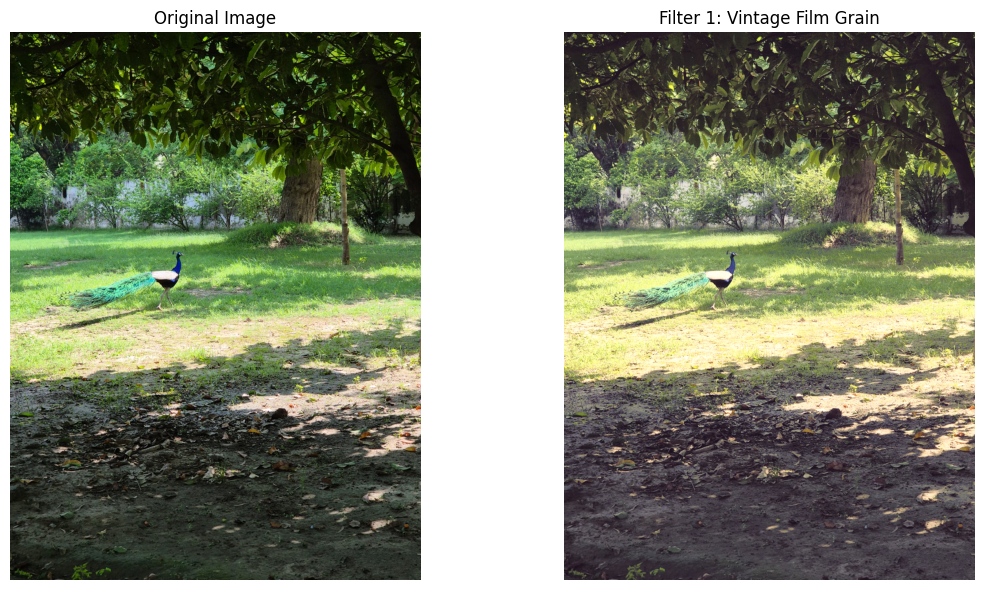

--- Filter 1: Vintage Film Grain ---
Modifications: This filter applies desaturation, a warm tone tint, a contrast boost, and subtle split toning (cool shadows, warm highlights) for an aged cinematic look.
Why chosen: These modifications are chosen to mimic the aesthetic of classic film photography and old cinema, creating a nostalgic and dramatic mood.
Suitable for: This filter works well with portraits, landscapes, urban scenes, or any image where a timeless, moody, and artistic feel is desired, particularly those with good contrast and varied lighting.




In [14]:
# Apply Filter 1
filtered_vintage_film = vintage_film_grain_filter(img_np)

# Plot Original vs. Vintage Film Grain Filtered
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_vintage_film)
plt.title("Filter 1: Vintage Film Grain")
plt.axis("off")
plt.tight_layout()
plt.show()

print("--- Filter 1: Vintage Film Grain ---")
print("Modifications: This filter applies desaturation, a warm tone tint, a contrast boost, and subtle split toning (cool shadows, warm highlights) for an aged cinematic look.")
print("Why chosen: These modifications are chosen to mimic the aesthetic of classic film photography and old cinema, creating a nostalgic and dramatic mood.")
print("Suitable for: This filter works well with portraits, landscapes, urban scenes, or any image where a timeless, moody, and artistic feel is desired, particularly those with good contrast and varied lighting.")
print("\n")


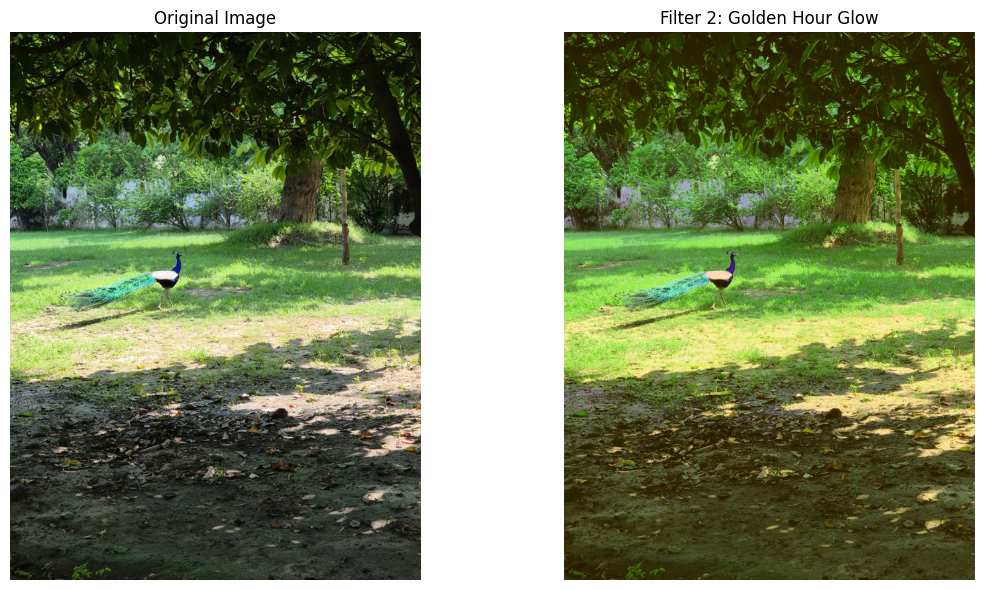

--- Filter 2: Golden Hour Glow ---
Modifications: This filter increases contrast, shifts hue towards warmer tones, boosts vibrance, and applies a warm yellow/orange tint.
Why chosen: These modifications are designed to mimic the rich, warm, and dramatic lighting characteristic of the 'golden hour' (sunrise/sunset).
Suitable for: This filter is effective for portraits, landscapes captured during sunrise or sunset, urban scenes, or any image where a warm, inviting, and dramatic atmosphere is desired.


In [15]:

# Apply Filter 2
filtered_golden_hour = golden_hour_glow_filter(img_np)

# Plot Original vs. Golden Hour Glow Filtered
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_golden_hour)
plt.title("Filter 2: Golden Hour Glow")
plt.axis("off")
plt.tight_layout()
plt.show()

print("--- Filter 2: Golden Hour Glow ---")
print("Modifications: This filter increases contrast, shifts hue towards warmer tones, boosts vibrance, and applies a warm yellow/orange tint.")
print("Why chosen: These modifications are designed to mimic the rich, warm, and dramatic lighting characteristic of the 'golden hour' (sunrise/sunset).")
print("Suitable for: This filter is effective for portraits, landscapes captured during sunrise or sunset, urban scenes, or any image where a warm, inviting, and dramatic atmosphere is desired.")

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def white_patch_balance(img_rgb):

    # Convert image to float32 for calculations to avoid overflow/underflow
    img_float = img_rgb.astype(np.float32)

    # Find the maximum intensity value for each channel
    # This assumes that the 'brightest' pixel should be truly white.
    max_r = np.max(img_float[..., 0])
    max_g = np.max(img_float[..., 1])
    max_b = np.max(img_float[..., 2])

    # Determine the global maximum value across all channels. This ensures that
    # we don't over-saturate any channel beyond 255. We want the overall brightest
    # pixel (across all channels) to become 255 in all channels.
    global_max = np.max([max_r, max_g, max_b])

    # Calculate scaling factors for each channel. If global_max is 0, avoid division by zero.
    scale_r = 255.0 / global_max if global_max > 0 else 1.0
    scale_g = 255.0 / global_max if global_max > 0 else 1.0
    scale_b = 255.0 / global_max if global_max > 0 else 1.0

    # Apply the scaling to each channel
    balanced_r = img_float[..., 0] * scale_r
    balanced_g = img_float[..., 1] * scale_g
    balanced_b = img_float[..., 2] * scale_b

    # Stack the channels back together
    balanced_img_float = np.stack([balanced_r, balanced_g, balanced_b], axis=-1)

    # Clip values to ensure they are within 0-255 range and convert back to uint8
    balanced_img_rgb = np.clip(balanced_img_float, 0, 255).astype(np.uint8)

    return balanced_img_rgb



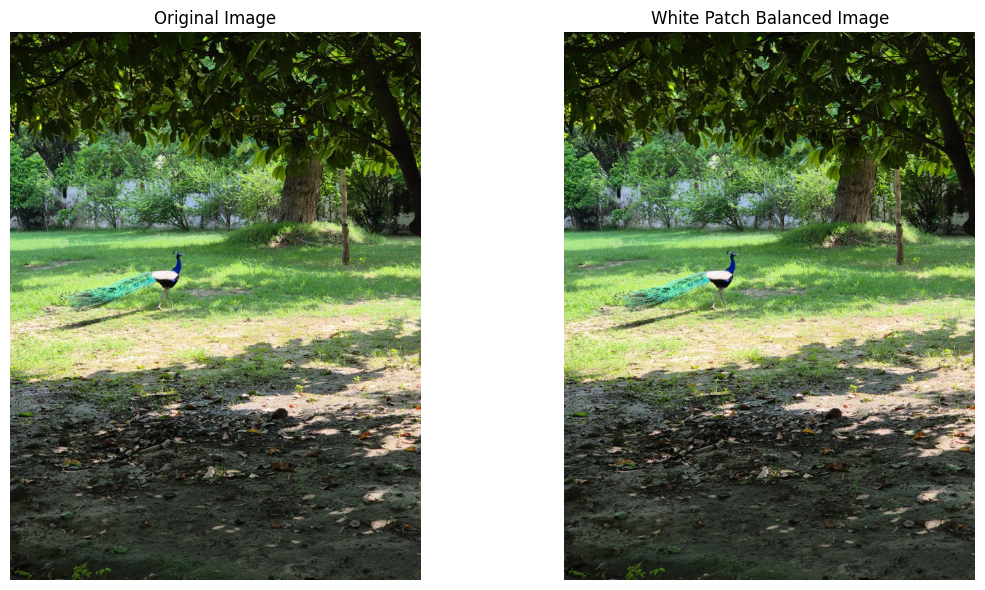

In [21]:
# Apply white patch balance
balanced_img = white_patch_balance(img_np)

# Display original and balanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(balanced_img)
plt.title("White Patch Balanced Image")
plt.axis("off")

plt.tight_layout()
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.